In [2]:
from pyphm.datasets.milling import MillingPrepMethodA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import scipy.io as sio # for reading matlab files
import zipfile
import gdown
import os
import glob

import warnings
warnings.filterwarnings("ignore") # supress all the matplotlib deprecation warnings
from IPython.display import clear_output, display, Image # incase you want to clear the output of a cell
%load_ext autoreload
%autoreload 2

c:\Users\stajyer\tspipe\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path_colab = Path.cwd().parent.parent / 'content'

if path_colab.exists():
    proj_dir = Path.cwd()
else:
    proj_dir = Path.cwd().parent

print(proj_dir)

c:\Users\stajyer\tspipe


In [3]:
raw_data_dir = proj_dir / 'data' / 'raw'

mill = MillingPrepMethodA(root=raw_data_dir, download=False)
data = mill.load_mat()

raw_milling_data_dir = raw_data_dir / 'milling'
processed_data_dir = proj_dir / 'data' / 'processed'
sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'

WINDOW = 1024
STRIDE = 64

milling_data_window = MillingPrepMethodA(root=raw_data_dir, window_len=WINDOW, stride=STRIDE, download=True)

df = milling_data_window.create_xy_dataframe()

print("Shape: ", df.shape)

Path(sub_dir).mkdir(parents=True, exist_ok=True)

df.to_csv(sub_dir / 'milling_processed.csv.gz', compression='gzip', index=False)

Shape:  (9313280, 11)


In [3]:
sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'

df = pd.read_csv(sub_dir / 'milling_processed.csv.gz')
df.head()

,cut_id,cut_no,case,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac,tool_class
0,0_0,0,1,0.000,0.219727,0.272827,0.733643,2.116699,6.840820,0.124512,0
1,0_0,0,1,0.004,0.246582,0.322266,0.778809,2.277832,6.660156,-0.561523,0
2,0_0,0,1,0.008,0.294189,0.283813,0.758057,2.343750,6.508789,-2.099609,0
3,0_0,0,1,0.012,0.323486,0.260010,0.726318,2.448730,6.542969,-2.731934,0
4,0_0,0,1,0.016,0.290527,0.253296,0.653076,2.546387,6.621094,-3.505859,0


In [35]:
raw_data_dir = proj_dir / 'data' / 'raw'

raw_milling_data = pd.read_csv(raw_data_dir / 'milling' / 'mill.csv')
raw_milling_data = raw_milling_data.drop(['Unnamed: 0'], axis=1)

In [223]:
raw_milling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case         167 non-null    int64  
 1   run          167 non-null    int64  
 2   VB           146 non-null    float64
 3   time         167 non-null    int64  
 4   DOC          167 non-null    float64
 5   feed         167 non-null    float64
 6   material     167 non-null    int64  
 7   smcAC        167 non-null    float64
 8   smcDC        167 non-null    float64
 9   vib_table    167 non-null    float64
 10  vib_spindle  167 non-null    float64
 11  AE_table     167 non-null    float64
 12  AE_spindle   167 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.1 KB


In [36]:
raw_milling_data.describe()

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,167.000000,167.000000,146.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000
mean,8.329341,7.167665,0.337603,26.113772,1.032934,0.372754,1.347305,-0.164495,1.336546e+00,7.948459e-02,0.285652,1.004229e-01,0.123872
std,4.764886,4.969367,0.260528,23.292643,0.364616,0.125356,0.477546,0.357721,1.893880e-01,3.654218e-02,0.030758,2.469953e-02,0.021194
min,1.000000,1.000000,0.000000,0.000000,0.750000,0.250000,1.000000,-0.798340,2.084677e-33,1.054677e-08,0.000003,4.074626e-11,0.000003
25%,3.000000,3.000000,0.150000,7.500000,0.750000,0.250000,1.000000,-0.551758,1.350098e+00,6.103516e-02,0.274658,9.277344e-02,0.110474
50%,10.000000,6.000000,0.285000,19.000000,0.750000,0.250000,1.000000,-0.156250,1.372070e+00,6.835938e-02,0.284424,1.019287e-01,0.122070
75%,12.000000,10.000000,0.467500,39.000000,1.500000,0.500000,2.000000,0.206299,1.391602e+00,8.300781e-02,0.297852,1.147461e-01,0.136414
max,16.000000,23.000000,1.530000,105.000000,1.500000,0.500000,2.000000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


In [37]:
raw_milling_data.isna().sum()

case            0
run             0
VB             21
time            0
DOC             0
feed            0
material        0
smcAC           0
smcDC           0
vib_table       0
vib_spindle     0
AE_table        0
AE_spindle      0
dtype: int64

In [52]:
### Pearson ###

pearson_corr = raw_milling_data.corr(method="pearson")

In [49]:
pearson_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.047886,0.253373,-0.109221,-0.160580,-0.194160,0.473620,-0.058081,0.162363,-0.477796,-0.182004,-0.029627,-0.110367
run,-0.047886,1.000000,0.625733,0.941573,-0.248264,-0.129943,-0.303920,-0.024212,0.204143,0.133830,-0.089062,0.105327,0.031430
VB,0.253373,0.625733,1.000000,0.509063,-0.033653,-0.019937,0.261415,-0.059403,0.149946,-0.110606,-0.254839,0.011542,-0.149821
time,-0.109221,0.941573,0.509063,1.000000,-0.258633,-0.156453,-0.443332,0.007973,0.206681,0.239667,-0.127997,0.184416,0.147960
DOC,-0.160580,-0.248264,-0.033653,-0.258633,1.000000,0.174614,-0.048788,0.021207,-0.148442,-0.096102,0.210296,0.024933,-0.059588
feed,-0.194160,-0.129943,-0.019937,-0.156453,0.174614,1.000000,-0.037209,0.104865,-0.198365,-0.233306,0.087499,-0.134397,-0.211765
material,0.473620,-0.303920,0.261415,-0.443332,-0.048788,-0.037209,1.000000,-0.010944,0.107970,-0.296074,0.006835,-0.282081,-0.256921
smcAC,-0.058081,-0.024212,-0.059403,0.007973,0.021207,0.104865,-0.010944,1.000000,-0.047164,0.161031,-0.034614,-0.026528,-0.068505
smcDC,0.162363,0.204143,0.149946,0.206681,-0.148442,-0.198365,0.107970,-0.047164,1.000000,0.095938,0.311706,0.195128,0.300523
vib_table,-0.477796,0.133830,-0.110606,0.239667,-0.096102,-0.233306,-0.296074,0.161031,0.095938,1.000000,0.077093,0.265829,0.383685


In [53]:
### Kendall ###

kendall_corr = raw_milling_data.corr(method="kendall")

In [50]:
kendall_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.054634,0.132062,-0.112893,-0.160001,-0.158933,0.435839,-0.045439,-0.096855,-0.359356,-0.184293,-0.078955,-0.093044
run,-0.054634,1.000000,0.576746,0.842698,-0.199826,-0.079325,-0.248990,-0.007019,0.251167,0.113295,-0.183083,0.031835,0.021630
VB,0.132062,0.576746,1.000000,0.505498,0.032256,0.029855,0.152082,0.005630,0.140898,-0.063339,-0.248042,-0.062952,-0.089705
time,-0.112893,0.842698,0.505498,1.000000,-0.183463,-0.102835,-0.381863,0.009877,0.255693,0.147650,-0.187404,0.110596,0.099874
DOC,-0.160001,-0.199826,0.032256,-0.183463,1.000000,0.174614,-0.048788,0.028081,-0.016605,-0.121611,0.166047,-0.025953,-0.066938
feed,-0.158933,-0.079325,0.029855,-0.102835,0.174614,1.000000,-0.037209,0.086777,-0.065438,-0.107170,0.139429,-0.165192,-0.186523
material,0.435839,-0.248990,0.152082,-0.381863,-0.048788,-0.037209,1.000000,-0.011885,-0.102629,-0.259647,-0.046896,-0.246162,-0.243497
smcAC,-0.045439,-0.007019,0.005630,0.009877,0.028081,0.086777,-0.011885,1.000000,0.188990,0.010596,-0.040865,-0.048563,-0.055061
smcDC,-0.096855,0.251167,0.140898,0.255693,-0.016605,-0.065438,-0.102629,0.188990,1.000000,0.046040,-0.062811,-0.010145,-0.013393
vib_table,-0.359356,0.113295,-0.063339,0.147650,-0.121611,-0.107170,-0.259647,0.010596,0.046040,1.000000,0.022381,0.135270,0.148678


In [54]:
### Spearman ###

spearman_corr = raw_milling_data.corr(method="spearman")

In [51]:
spearman_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.071892,0.195280,-0.159326,-0.188780,-0.187521,0.514235,-0.064788,-0.132589,-0.512118,-0.258515,-0.099497,-0.121757
run,-0.071892,1.000000,0.745307,0.952192,-0.236908,-0.094045,-0.295196,-0.007193,0.359337,0.168812,-0.254311,0.047977,0.033287
VB,0.195280,0.745307,1.000000,0.669358,0.039084,0.036174,0.184275,0.004023,0.212770,-0.091406,-0.358086,-0.090992,-0.134186
time,-0.159326,0.952192,0.669358,1.000000,-0.221547,-0.124182,-0.461133,0.011381,0.366659,0.223404,-0.264623,0.158800,0.144986
DOC,-0.188780,-0.236908,0.039084,-0.221547,1.000000,0.174614,-0.048788,0.034214,-0.019887,-0.145189,0.200984,-0.031526,-0.081376
feed,-0.187521,-0.094045,0.036174,-0.124182,0.174614,1.000000,-0.037209,0.105729,-0.078369,-0.127949,0.168767,-0.200667,-0.226755
material,0.514235,-0.295196,0.184275,-0.461133,-0.048788,-0.037209,1.000000,-0.014480,-0.122908,-0.309989,-0.056763,-0.299025,-0.296018
smcAC,-0.064788,-0.007193,0.004023,0.011381,0.034214,0.105729,-0.014480,1.000000,0.283063,0.014430,-0.055569,-0.071661,-0.081625
smcDC,-0.132589,0.359337,0.212770,0.366659,-0.019887,-0.078369,-0.122908,0.283063,1.000000,0.071636,-0.091360,-0.011405,-0.018348
vib_table,-0.512118,0.168812,-0.091406,0.223404,-0.145189,-0.127949,-0.309989,0.014430,0.071636,1.000000,0.038466,0.195722,0.215589


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9313280 entries, 0 to 9313279
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cut_id       object 
 1   cut_no       int64  
 2   case         int64  
 3   time         float64
 4   ae_spindle   float64
 5   ae_table     float64
 6   vib_spindle  float64
 7   vib_table    float64
 8   smcdc        float64
 9   smcac        float64
 10  tool_class   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 781.6+ MB


In [4]:
df.describe()

,cut_no,case,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac,tool_class
count,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06
mean,8.302804e+01,8.322265e+00,2.046000e+00,2.449860e-01,2.044290e-01,3.138266e-01,9.695972e-01,7.375682e+00,-1.572128e-01,7.089610e-01
std,4.794389e+01,4.719888e+00,1.182413e+00,9.098135e-02,7.263016e-02,7.656384e-02,3.957817e-01,2.042010e+00,2.093879e+00,5.935905e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,9.094238e-02,1.220703e-02,2.160644e-01,1.904297e-01,3.417969e+00,-6.967773e+00,0.000000e+00
25%,4.200000e+01,3.000000e+00,1.023000e+00,1.782227e-01,1.544189e-01,2.734375e-01,6.909180e-01,5.712891e+00,-1.784668e+00,0.000000e+00
50%,8.200000e+01,1.000000e+01,2.046000e+00,2.227783e-01,1.916504e-01,2.905273e-01,9.033203e-01,7.338867e+00,-1.489258e-01,1.000000e+00
75%,1.250000e+02,1.200000e+01,3.069000e+00,2.917480e-01,2.459717e-01,3.173828e-01,1.159668e+00,9.599609e+00,1.464844e+00,1.000000e+00
max,1.660000e+02,1.600000e+01,4.092000e+00,9.790039e-01,6.121826e-01,1.657715e+00,2.861328e+00,9.995117e+00,6.777344e+00,2.000000e+00


In [5]:
df.isna().sum()

cut_id         0
cut_no         0
case           0
time           0
ae_spindle     0
ae_table       0
vib_spindle    0
vib_table      0
smcdc          0
smcac          0
tool_class     0
dtype: int64

In [5]:
# --- EXAMPLE 1 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "root_mean_square": None,
    "mean": None,
    "kurtosis": None
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


,cut_id,cut_no__root_mean_square,cut_no__mean,cut_no__kurtosis,case__root_mean_square,case__mean,case__kurtosis,ae_spindle__root_mean_square,ae_spindle__mean,ae_spindle__kurtosis,...,smcdc__kurtosis,smcac__root_mean_square,smcac__mean,smcac__kurtosis,tool_class__root_mean_square,tool_class__mean,tool_class__kurtosis,cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,1.0,1.0,0.0,0.218442,0.213459,0.362453,...,-0.017042,1.835022,-0.193081,-1.266514,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,1.0,1.0,0.0,0.216922,0.212069,0.487595,...,-0.042394,1.832819,-0.162208,-1.256077,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,1.0,1.0,0.0,0.211146,0.207769,0.439928,...,-0.061250,1.824547,-0.180714,-1.265339,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,1.0,1.0,0.0,0.210489,0.207282,0.426394,...,-0.062503,1.819315,-0.184751,-1.267439,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,1.0,1.0,0.0,0.210593,0.207503,0.502707,...,-0.083880,1.816610,-0.136020,-1.259084,0.0,0.0,0.0,0,1,0


In [6]:
# --- EXAMPLE 2 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "fft_coefficient": [{"coeff": 5, "attr": s} for s in ["real", "imag", "abs", "angle"]]
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


,cut_id,"cut_no__fft_coefficient__attr_""real""__coeff_5","cut_no__fft_coefficient__attr_""imag""__coeff_5","cut_no__fft_coefficient__attr_""abs""__coeff_5","cut_no__fft_coefficient__attr_""angle""__coeff_5","case__fft_coefficient__attr_""real""__coeff_5","case__fft_coefficient__attr_""imag""__coeff_5","case__fft_coefficient__attr_""abs""__coeff_5","case__fft_coefficient__attr_""angle""__coeff_5","ae_spindle__fft_coefficient__attr_""real""__coeff_5",...,"smcac__fft_coefficient__attr_""imag""__coeff_5","smcac__fft_coefficient__attr_""abs""__coeff_5","smcac__fft_coefficient__attr_""angle""__coeff_5","tool_class__fft_coefficient__attr_""real""__coeff_5","tool_class__fft_coefficient__attr_""imag""__coeff_5","tool_class__fft_coefficient__attr_""abs""__coeff_5","tool_class__fft_coefficient__attr_""angle""__coeff_5",cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.410935,...,37.844972,64.889541,35.677442,0.0,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292361,...,68.351345,88.072253,129.096710,0.0,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.518225,...,-77.430252,79.462937,-77.012652,0.0,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.771915,...,44.369712,69.037336,39.992815,0.0,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466645,...,62.011007,74.819206,124.023173,0.0,0.0,0.0,0.0,0,1,0


In [7]:
# --- EXAMPLE 3 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "cwt_coefficients": [{"widths": width, "coeff": coeff, "w": w} for
                             width in [(2, 5, 10, 20)] for coeff in range(15) for w in (2, 5, 10, 20)],
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


,cut_id,"cut_no__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)",...,"tool_class__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)",cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [9]:
from tsfresh import feature_extraction

window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "abs_energy": None,
    "absolute_sum_of_changes": None,
    "agg_autocorrelation": [{"f_agg": s, "maxlag": 35} for s in ["mean", "median", "var"]],
    "agg_linear_trend": [{"f_agg": s, "attr": n, "chunk_len": 10} for s in ["max", "min", "mean", "var"]
                           for n in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    "approximate_entropy": [{"m": 2, "r": r} for r in [0.2, 0.5, 0.9]],
    #"autocorrelation": [{"lag": 50}], #AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.
    "benford_correlation": None,
    "binned_entropy": [{"max_bins": 10}],
    "c3": [{"lag": 50}],
    "cid_ce": [{"normalize": True, "normalize": False}],
    "count_above": [{"t": 0}],
    "count_above_mean": None,
    "count_below": [{"t": 0}],
    "count_above_mean": None,
    #"cwt_coefficients",
    #"energy_ratio_by_chunks",
    "fft_aggregated": [{"aggtype": s} for s in ["centroid", "variance", "skew", "kurtosis"]],
    "fft_coefficient": [{"coeff": 5, "attr": s} for s in ["real", "imag", "abs", "angle"]],
    "fourier_entropy": [{"bins": s} for s in [2, 4, 7, 10, 50, 100]],
    #"friedrich_coefficients",
    #"index_mass_quantile": [{"q": 0.5}], #AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.
    "kurtosis": None,
    "large_standard_deviation": [{"r": r} for r in [0.1, 0.3, 0.5, 0.7, 0.9]],
    #"lempel_ziv_complexity",
    "length": None,
    "linear_trend": [{"attr": s} for s in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    "linear_trend_timewise": [{"attr": s} for s in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    #"matrix_profile": [{"sample_pct": x, "threshold": 0.98, "feature": z} for x in [0.2, 0.4, 0.6, 0.8, 1]
    #                      for z in ["min", "max", "mean", "median", "25", "75"]], #ImportError, matrixprofile required.
    #"max_langevin_fixed_point",
    "maximum": None,
    "mean": None,
    "mean_abs_change": None,
    "mean_change": None,
    "mean_second_derivative_central": None,
    "median": None,
    "minimum": None,
    "number_crossing_m": [{"m": -1}, {"m": 0}, {"m": 1}],
    "number_cwt_peaks": [{"n": 3}],
    "number_peaks": [{"n": n} for n in [3, 5, 10, 30, 50]],
    #"partial_autocorrelation",
    #"permutation_entropy",
    "quantile": [{"q": q} for q in [0.1, 0.3, 0.5, 0.7, 0.9]],
    #"ratio_beyond_r_sigma",
    "root_mean_square": None,
    "sample_entropy": None,
    "skewness": None,
    #"spkt_welch_density",
    "standard_deviation": None,
    #"symmetry_looking",
    #"time_reversal_asymmetry_statistic",
    "variance": None,
    "variation_coefficient": None,
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.to_csv(window_processed_dir / file_name, index=False)

Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

In [4]:
path_processed_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
path_processed_dir.mkdir(parents=True, exist_ok=True)

In [6]:
zip_file_name = 'milling_features_comp_stride64_len1024.zip'

gdown.download(
    id='1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j', 
    output=str(path_processed_dir / zip_file_name), 
    quiet=False
    )

with zipfile.ZipFile(path_processed_dir / zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(path_processed_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j
From (redirected): https://drive.google.com/uc?id=1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j&confirm=t&uuid=b2ac7667-9efa-4f37-83d2-c16a06478a0e
To: c:\Users\stajyer\tspipe\data\processed\window1024_stride64_test\milling_features_comp_stride64_len1024.zip
100%|██████████| 321M/321M [00:35<00:00, 9.02MB/s] 


In [5]:
df_features_downloaded = pd.read_csv(path_processed_dir / 'milling_features_comp_stride64_len1024.csv')
df_features_downloaded.head()


,cut_id,smcac__time_reversal_asymmetry_statistic__lag_1,smcac__time_reversal_asymmetry_statistic__lag_2,smcac__time_reversal_asymmetry_statistic__lag_3,smcac__c3__lag_1,smcac__c3__lag_2,smcac__c3__lag_3,smcac__cid_ce__normalize_True,smcac__cid_ce__normalize_False,smcac__symmetry_looking__r_0.0,...,smcdc__query_similarity_count__query_None__threshold_0.0,"smcdc__matrix_profile__feature_""min""__threshold_0.98","smcdc__matrix_profile__feature_""max""__threshold_0.98","smcdc__matrix_profile__feature_""mean""__threshold_0.98","smcdc__matrix_profile__feature_""median""__threshold_0.98","smcdc__matrix_profile__feature_""25""__threshold_0.98","smcdc__matrix_profile__feature_""75""__threshold_0.98",cut_no,case,tool_class
0,87_20,-0.009862,-0.008820,0.002745,-0.997182,-0.733741,-0.354140,11.424614,17.725740,0.0,...,NaN,3.789384,5.941307,4.691854,4.617381,3.912163,5.372661,87,11,1
1,87_21,-0.014233,-0.006940,0.003651,-1.006841,-0.739986,-0.355168,11.403917,17.642734,0.0,...,NaN,3.022031,5.579988,3.749164,3.582706,3.339192,4.022824,87,11,1
2,87_22,-0.023152,-0.024342,-0.000312,-1.067194,-0.764072,-0.354402,11.388923,17.604872,0.0,...,NaN,2.896524,5.421811,3.517452,3.349038,3.180649,3.620394,87,11,1
3,87_23,-0.008329,-0.001119,0.017044,-1.070455,-0.782522,-0.374350,11.327472,17.496560,0.0,...,NaN,2.866619,5.212993,3.357202,3.245255,3.119372,3.488481,87,11,1
4,87_24,0.006926,0.018749,0.019649,-1.014428,-0.744961,-0.359926,11.280507,17.361086,0.0,...,NaN,2.866619,4.435201,3.249217,3.202348,3.032700,3.403513,87,11,1


In [8]:
print(df_features_downloaded.columns)

Index(['cut_id', 'smcac__time_reversal_asymmetry_statistic__lag_1',
       'smcac__time_reversal_asymmetry_statistic__lag_2',
       'smcac__time_reversal_asymmetry_statistic__lag_3', 'smcac__c3__lag_1',
       'smcac__c3__lag_2', 'smcac__c3__lag_3', 'smcac__cid_ce__normalize_True',
       'smcac__cid_ce__normalize_False', 'smcac__symmetry_looking__r_0.0',
       ...
       'smcdc__query_similarity_count__query_None__threshold_0.0',
       'smcdc__matrix_profile__feature_"min"__threshold_0.98',
       'smcdc__matrix_profile__feature_"max"__threshold_0.98',
       'smcdc__matrix_profile__feature_"mean"__threshold_0.98',
       'smcdc__matrix_profile__feature_"median"__threshold_0.98',
       'smcdc__matrix_profile__feature_"25"__threshold_0.98',
       'smcdc__matrix_profile__feature_"75"__threshold_0.98', 'cut_no', 'case',
       'tool_class'],
      dtype='object', length=4510)


In [9]:
# get the percentage of each tool_class
df_p = df_features_downloaded.groupby("tool_class").size() / df_features_downloaded.shape[0] * 100
df_p = df_p.reset_index()
df_p.columns = ["tool_class", "percentage"]

# get the count of each tool_class
df_c = df_features_downloaded.groupby("tool_class").size().to_frame().reset_index()
df_c.columns = ["tool_class", "count"]

# merge the two dataframes
df_pc = df_p.merge(df_c, on="tool_class")[["tool_class", "count", "percentage"]]
df_pc["percentage"] = df_pc["percentage"].round(2)
df_pc

,tool_class,count,percentage
0,0,3311,36.63
1,1,5065,56.03
2,2,664,7.35


In [64]:
### Turning the results into a binary classification problem. ###

df_b = {'tool_class': [0, 1], 
        'count': [df_pc['count'][0] + df_pc['count'][1], df_pc['count'][2]], 
        'percentage': [df_pc['percentage'][0] + df_pc['percentage'][1], df_pc['percentage'][2]]}

df_b = pd.DataFrame(data=df_b)
df_b

,tool_class,count,percentage
0,0,8376,92.66
1,1,664,7.35


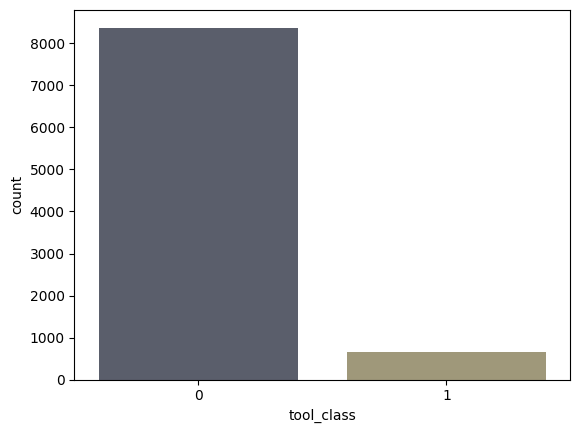

In [229]:
tool_bar_plot = sns.barplot(x="tool_class", y="count", data = df_b, palette="cividis")

fig = tool_bar_plot.get_figure()
fig.savefig("tool_bar_plot.png")

In [6]:
df_features_downloaded_b = df_features_downloaded
df_features_downloaded_b = df_features_downloaded_b.replace(1, 0)
df_features_downloaded_b = df_features_downloaded_b.replace(2, 1)

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

scaler = StandardScaler()
imputed_df_sc = scaler.fit_transform(imputed_df)

imputed_df_sc = pd.DataFrame(imputed_df_sc, columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

relevance_table = calculate_relevance_table(imputed_df_sc, imputed_df_tool_class)

print(relevance_table)

relevance_table = relevance_table.sort_values("p_value", inplace=True)

                                                                                              feature  \
feature                                                                                                 
vib_spindle__quantile__q_0.7                                             vib_spindle__quantile__q_0.7   
vib_spindle__quantile__q_0.6                                             vib_spindle__quantile__q_0.6   
vib_spindle__fft_coefficient__attr_"real"__coeff_0  vib_spindle__fft_coefficient__attr_"real"__coe...   
vib_spindle__fft_coefficient__attr_"abs"__coeff_0   vib_spindle__fft_coefficient__attr_"abs"__coeff_0   
vib_spindle__quantile__q_0.8                                             vib_spindle__quantile__q_0.8   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                           smcdc__number_crossing_m__m_0   
smcdc__number_crossing_m__m_-1                         

In [35]:
df_selected = select_features(imputed_df_sc, imputed_df_tool_class)

print(df_selected)

      vib_spindle__quantile__q_0.7  vib_spindle__quantile__q_0.6  \
0                        -0.603003                     -0.603893   
1                        -0.603003                     -0.603893   
2                        -0.589502                     -0.603893   
3                        -0.589502                     -0.603893   
4                        -0.589502                     -0.603893   
...                            ...                           ...   
9035                     -0.514499                     -0.525499   
9036                     -0.514499                     -0.525499   
9037                     -0.529500                     -0.525499   
9038                     -0.529500                     -0.525499   
9039                     -0.529500                     -0.525499   

      vib_spindle__fft_coefficient__attr_"real"__coeff_0  \
0                                             -0.609765    
1                                             -0.608637    
2  

In [7]:
### OVERSAMPLING ###

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.impute import SimpleImputer

ros = RandomOverSampler(random_state=10)
sm = SMOTE(random_state=10)
ada = ADASYN(random_state=10)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_over_ros, y_over_ros = ros.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])
#x_over_sm, _ = sm.fit_resample(imputed_df, imputed_df_tool_class)
#x_over_ada, _ = ada.fit_resample(imputed_df, imputed_df_tool_class)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_over_ros)

x_over_ros_sc = pd.DataFrame(scaler.transform(x_over_ros), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

x_over_ros_sc

,cut_id,smcac__time_reversal_asymmetry_statistic__lag_1,smcac__time_reversal_asymmetry_statistic__lag_2,smcac__time_reversal_asymmetry_statistic__lag_3,smcac__c3__lag_1,smcac__c3__lag_2,smcac__c3__lag_3,smcac__cid_ce__normalize_True,smcac__cid_ce__normalize_False,smcac__symmetry_looking__r_0.0,...,smcdc__permutation_entropy__dimension_6__tau_1,smcdc__permutation_entropy__dimension_7__tau_1,"smcdc__matrix_profile__feature_""min""__threshold_0.98","smcdc__matrix_profile__feature_""max""__threshold_0.98","smcdc__matrix_profile__feature_""mean""__threshold_0.98","smcdc__matrix_profile__feature_""median""__threshold_0.98","smcdc__matrix_profile__feature_""25""__threshold_0.98","smcdc__matrix_profile__feature_""75""__threshold_0.98",cut_no,case
0,0.005281,-0.064031,-0.330596,-0.270172,0.910959,0.955820,0.943897,-0.811124,-1.007431,0.0,...,0.726078,0.762212,-0.865334,-0.978462,-0.919387,-0.908512,-0.904662,-0.922300,-0.349427,0.244375
1,0.005462,-0.125797,-0.315086,-0.265923,0.904871,0.948870,0.938162,-0.881854,-1.015975,0.0,...,0.725034,0.758272,-0.894621,-0.993872,-0.956442,-0.948887,-0.926894,-0.975067,-0.349427,0.244375
2,0.005642,-0.251839,-0.458608,-0.284497,0.866834,0.922066,0.942438,-0.933097,-1.019873,0.0,...,0.725134,0.759159,-0.899411,-1.000619,-0.965550,-0.958005,-0.933045,-0.990798,-0.349427,0.244375
3,0.005823,-0.042369,-0.267083,-0.203166,0.864779,0.901533,0.831145,-1.143098,-1.031023,0.0,...,0.722756,0.755622,-0.900552,-1.009525,-0.971849,-0.962055,-0.935423,-0.995955,-0.349427,0.244375
4,0.006003,0.173202,-0.103218,-0.190956,0.900090,0.943333,0.911615,-1.303594,-1.044969,0.0,...,0.731669,0.765674,-0.900552,-1.042698,-0.976093,-0.963729,-0.938786,-0.999276,-0.349427,0.244375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16747,1.015109,-0.109907,-0.568417,-1.396828,-0.231761,-0.134101,0.383120,0.709539,0.468790,0.0,...,-1.190175,-1.190860,1.175822,1.050642,1.147380,1.146158,1.165685,1.106467,0.850306,0.688409
16748,0.985323,0.277547,0.083826,0.165953,0.181276,0.081014,-0.421391,0.168442,-0.021759,0.0,...,0.816843,0.820986,-0.839736,-0.958793,-0.897706,-0.873653,-0.873945,-0.911926,0.807458,0.688409
16749,-1.362698,3.556246,2.161577,0.090074,-2.258203,-2.121466,-0.776110,1.962006,2.425021,0.0,...,-1.190175,-1.190860,1.175822,1.050642,1.147380,1.146158,1.165685,1.106467,0.229015,-1.087727
16750,0.964022,0.328105,0.241929,0.117398,0.174766,0.162855,-0.133696,-0.339357,-0.235797,0.0,...,0.816751,0.827353,-0.870845,-1.051815,-0.950531,-0.936816,-0.909958,-0.974777,0.786034,0.688409


In [9]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_over_ros_sc.shape)
print(y_over_ros.shape)

ros_relevance_table = calculate_relevance_table(x_over_ros_sc, y_over_ros)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(16752, 4503)
(16752,)
                                                                                       feature  \
feature                                                                                          
smcdc__permutation_entropy__dimension_7__tau_1  smcdc__permutation_entropy__dimension_7__tau_1   
smcac__autocorrelation__lag_8                                    smcac__autocorrelation__lag_8   
smcac__autocorrelation__lag_7                                    smcac__autocorrelation__lag_7   
smcac__c3__lag_3                                                              smcac__c3__lag_3   
smcac__c3__lag_2                                                              smcac__c3__lag_2   
...                                                                                        ...   
smcdc__number_crossing_m__m_0                                    smcdc__number_crossing_m__m_0   
smcdc__number_crossing_m__m_-1                                  smcdc__number_crossing_m__m_-1 

In [10]:
df_selected_ros = select_features(x_over_ros_sc, y_over_ros)

print(df_selected_ros)

       smcdc__permutation_entropy__dimension_7__tau_1  \
0                                            0.762212   
1                                            0.758272   
2                                            0.759159   
3                                            0.755622   
4                                            0.765674   
...                                               ...   
16747                                       -1.190860   
16748                                        0.820986   
16749                                       -1.190860   
16750                                        0.827353   
16751                                        0.750648   

       smcac__autocorrelation__lag_8  smcac__autocorrelation__lag_7  \
0                           1.039265                       1.091762   
1                           0.958371                       1.036413   
2                           0.976276                       1.044905   
3                           1.0

In [11]:
### UNDERSAMPLING ###

from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

rus = RandomUnderSampler(random_state=10)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_under_rus, y_under_rus = rus.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_under_rus)

x_under_rus_sc = pd.DataFrame(scaler.transform(x_under_rus), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

In [13]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_under_rus_sc.shape)
print(y_under_rus.shape)

y_under_rus = y_under_rus.reset_index(drop=True)

print(x_under_rus_sc.sort_index().index)
print(y_under_rus.sort_index().index)

ros_relevance_table = calculate_relevance_table(x_under_rus_sc, y_under_rus)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(1328, 4503)
(1328,)
RangeIndex(start=0, stop=1328, step=1)
RangeIndex(start=0, stop=1328, step=1)
                                                                                              feature  \
feature                                                                                                 
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
smcdc__quantile__q_0.1                                                         smcdc__quantile__q_0.1   
smcdc__fft_coefficient__attr_"abs"__coeff_12             smcdc__fft_coefficient__attr_"abs"__coeff_12   
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                

In [14]:
df_selected_rus = select_features(x_under_rus_sc, y_under_rus)

print(df_selected_rus)

      smcdc__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"  \
0                                             -2.022682                      
1                                             -2.176545                      
2                                              0.113014                      
3                                              0.900918                      
4                                              0.900918                      
...                                                 ...                      
1323                                          -0.425996                      
1324                                          -0.581758                      
1325                                          -0.574315                      
1326                                          -0.570594                      
1327                                          -0.562790                      

      smcdc__quantile__q_0.1  smcdc__fft_coefficient__attr_"abs

In [15]:
### HYBRID ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rush = RandomUnderSampler(random_state=14, sampling_strategy=0.5)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_under_rush, y_under_rush = rush.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])

rosh = RandomOverSampler(random_state=14, sampling_strategy=1)

x_over_rosh, y_over_rosh = rush.fit_resample(x_under_rush, y_under_rush)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_over_rosh)

x_over_rosh_sc = pd.DataFrame(scaler.transform(x_over_rosh), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

In [17]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_over_rosh_sc.shape)
print(y_over_rosh.shape)

y_over_rosh = y_over_rosh.reset_index(drop=True)

print(x_over_rosh_sc.sort_index().index)
print(y_over_rosh.sort_index().index)

ros_relevance_table = calculate_relevance_table(x_over_rosh_sc, y_over_rosh)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(1992, 4503)
(1992,)
RangeIndex(start=0, stop=1992, step=1)
RangeIndex(start=0, stop=1992, step=1)
                                                                                              feature  \
feature                                                                                                 
vib_spindle__quantile__q_0.7                                             vib_spindle__quantile__q_0.7   
vib_spindle__quantile__q_0.8                                             vib_spindle__quantile__q_0.8   
vib_spindle__c3__lag_1                                                         vib_spindle__c3__lag_1   
vib_spindle__fft_coefficient__attr_"abs"__coeff_0   vib_spindle__fft_coefficient__attr_"abs"__coeff_0   
vib_spindle__fft_coefficient__attr_"real"__coeff_0  vib_spindle__fft_coefficient__attr_"real"__coe...   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                

In [18]:
df_selected_rosh = select_features(x_over_rosh_sc, y_over_rosh)

print(df_selected_rosh)

      vib_spindle__quantile__q_0.7  vib_spindle__quantile__q_0.8  \
0                        -0.526105                     -0.524518   
1                         0.051683                      0.030182   
2                        -0.328007                     -0.334335   
3                        -0.014350                     -0.017363   
4                        -0.129908                     -0.137813   
...                            ...                           ...   
1987                     -0.443564                     -0.445275   
1988                     -0.476581                     -0.461124   
1989                     -0.476581                     -0.461124   
1990                     -0.476581                     -0.461124   
1991                     -0.476581                     -0.445275   

      vib_spindle__c3__lag_1  \
0                  -0.363707   
1                  -0.093201   
2                  -0.282572   
3                  -0.142688   
4                  -0.1

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit(imputed_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.42627088 0.18959323]
[498649.39864188 332555.30496184]


MODEL

In [42]:
### Imputed Raw Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected.iloc[:,:5]
y = imputed_df_tool_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.6,"vib_spindle__fft_coefficient__attr_""real""__coeff_0","vib_spindle__fft_coefficient__attr_""abs""__coeff_0",vib_spindle__quantile__q_0.8
6354,0.927056,0.948303,0.960278,0.960278,0.923971
1541,0.237029,0.227081,0.190128,0.190128,0.247192
3133,1.150564,1.183484,1.201322,1.201322,1.125565
322,-0.019480,-0.008101,0.001530,0.001530,-0.040800
2031,-0.184487,-0.180567,-0.172324,-0.172324,-0.184795


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.9196165191740413
Precision: 0.8535403692778324
Recall: 0.9196165191740413
F1 Score: 0.8853472904533798
Confusion Matrix:
[[2494   12]
 [ 206    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2506
           1       0.00      0.00      0.00       206

    accuracy                           0.92      2712
   macro avg       0.46      0.50      0.48      2712
weighted avg       0.85      0.92      0.89      2712

----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.9472713864306784
Precision: 0.9481099972499699
Recall: 0.9472713864306784
F1 Score: 0.947674967086968
Confusion Matrix:
[[2431   75]
 [  68  138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2506
           1       0.65      0.67      0.66       206

    accuracy                      

In [46]:
### Oversampled Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected_ros.iloc[:,:5]
y = y_over_ros

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_ros.head()

,smcdc__permutation_entropy__dimension_7__tau_1,smcac__autocorrelation__lag_8,smcac__autocorrelation__lag_7,smcac__c3__lag_3,smcac__c3__lag_2
4600,0.608784,0.457520,0.585417,0.221544,0.522597
16016,-1.190860,-0.722500,-0.648227,-0.356546,0.109586
8675,0.863906,1.448536,1.426030,1.952561,1.381978
4371,0.758349,-0.109811,-0.068548,-0.556902,-0.094243
8618,0.872404,1.479472,1.473392,2.078171,1.432502


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_ros, y_train_ros)
    y_pred_ros = clf.predict(X_test_ros)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_ros, y_pred_ros)
    precision = precision_score(y_test_ros, y_pred_ros, average='weighted')
    recall = recall_score(y_test_ros, y_pred_ros, average='weighted')
    f1 = f1_score(y_test_ros, y_pred_ros, average='weighted')
    conf_matrix = confusion_matrix(y_test_ros, y_pred_ros)
    class_report = classification_report(y_test_ros, y_pred_ros)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.7825308396339037
Precision: 0.7840510701838567
Recall: 0.7825308396339037
F1 Score: 0.7822948462557401
Confusion Matrix:
[[1890  636]
 [ 457 2043]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2526
           1       0.76      0.82      0.79      2500

    accuracy                           0.78      5026
   macro avg       0.78      0.78      0.78      5026
weighted avg       0.78      0.78      0.78      5026

----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.9948269001193792
Precision: 0.9948801465947934
Recall: 0.9948269001193792
F1 Score: 0.9948269001193792
Confusion Matrix:
[[2500   26]
 [   0 2500]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2526
           1       0.99      1.00      0.99      2500

    accuracy                     

In [48]:
### Undersampled Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected_rus.iloc[:,:5]
y = y_under_rus

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_rus.head()

,"smcdc__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""min""",smcdc__quantile__q_0.1,"smcdc__fft_coefficient__attr_""abs""__coeff_12","smcdc__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","smcdc__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min"""
618,-0.225779,-0.202900,-0.362653,-0.223595,-0.220059
538,0.900918,0.898666,-0.503334,0.889859,0.883509
139,0.237922,0.240202,-0.366861,0.246524,0.261044
1164,0.900918,0.898666,-0.503334,0.889859,0.883509
1029,0.391796,0.398629,-0.397801,0.394961,0.408202


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_rus, y_train_rus)
    y_pred_rus = clf.predict(X_test_rus)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_rus, y_pred_rus)
    precision = precision_score(y_test_rus, y_pred_rus, average='weighted')
    recall = recall_score(y_test_rus, y_pred_rus, average='weighted')
    f1 = f1_score(y_test_rus, y_pred_rus, average='weighted')
    conf_matrix = confusion_matrix(y_test_rus, y_pred_rus)
    class_report = classification_report(y_test_rus, y_pred_rus)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.8220551378446115
Precision: 0.8293125262898924
Recall: 0.8220551378446115
F1 Score: 0.8212743679529793
Confusion Matrix:
[[152  50]
 [ 21 176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       202
           1       0.78      0.89      0.83       197

    accuracy                           0.82       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.82      0.82       399

----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.8796992481203008
Precision: 0.8886827508274837
Recall: 0.8796992481203008
F1 Score: 0.8791302744804703
Confusion Matrix:
[[163  39]
 [  9 188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       202
           1       0.83      0.95      0.89       197

    accuracy                           0.

In [51]:
### Hybrid Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected_rosh.iloc[:,:5]
y = y_over_rosh

X_train_rosh, X_test_rosh, y_train_rosh, y_test_rosh = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_rosh.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.8,vib_spindle__c3__lag_1,"vib_spindle__fft_coefficient__attr_""abs""__coeff_0","vib_spindle__fft_coefficient__attr_""real""__coeff_0"
557,2.016163,1.979557,1.371530,2.054733,2.054733
693,-0.427056,-0.429426,-0.322284,-0.429692,-0.429692
1858,-0.460073,-0.461124,-0.334300,-0.460085,-0.460085
1341,-0.509597,-0.524518,-0.352931,-0.508471,-0.508471
1615,-0.542614,-0.524518,-0.370488,-0.558254,-0.558254


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_rosh, y_train_rosh)
    y_pred_rosh = clf.predict(X_test_rosh)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_rosh, y_pred_rosh)
    precision = precision_score(y_test_rosh, y_pred_rosh, average='weighted')
    recall = recall_score(y_test_rosh, y_pred_rosh, average='weighted')
    f1 = f1_score(y_test_rosh, y_pred_rosh, average='weighted')
    conf_matrix = confusion_matrix(y_test_rosh, y_pred_rosh)
    class_report = classification_report(y_test_rosh, y_pred_rosh)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.8093645484949833
Precision: 0.8307650694326711
Recall: 0.8093645484949833
F1 Score: 0.8139367664113271
Confusion Matrix:
[[319  83]
 [ 31 165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       402
           1       0.67      0.84      0.74       196

    accuracy                           0.81       598
   macro avg       0.79      0.82      0.80       598
weighted avg       0.83      0.81      0.81       598

----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.8662207357859532
Precision: 0.8650946851032589
Recall: 0.8662207357859532
F1 Score: 0.8654862129374873
Confusion Matrix:
[[366  36]
 [ 44 152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       402
           1       0.81      0.78      0.79       196

    accuracy                           0.